In [1]:
%%time

! pip install -q kaggle

CPU times: user 20.9 ms, sys: 8.8 ms, total: 29.7 ms
Wall time: 3.73 s


In [2]:
%%time
from google.colab import files

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 15.7 µs


In [3]:
%%time

files.upload()

Saving kaggle.json to kaggle.json
CPU times: user 155 ms, sys: 29.7 ms, total: 185 ms
Wall time: 23.3 s


{'kaggle.json': b'{"username":"sadivamadaan","key":"98e973d88763e3cb86aad454f89534ea"}'}

In [4]:
%%time

! mkdir ~/.kaggle

CPU times: user 4.27 ms, sys: 6.29 ms, total: 10.6 ms
Wall time: 114 ms


In [5]:
%%time

! cp kaggle.json ~/.kaggle/

CPU times: user 4.2 ms, sys: 5.1 ms, total: 9.3 ms
Wall time: 113 ms


In [7]:
%%time

! chmod 600 ~/.kaggle/kaggle.json

CPU times: user 4.43 ms, sys: 6.13 ms, total: 10.6 ms
Wall time: 111 ms


In [8]:
%%time

! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-30 14:37:36          16608  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10007  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4659  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3674  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [9]:
%%time

! kaggle datasets download -d xainano/handwrittenmathsymbols

 98% 336M/343M [00:07<00:00, 66.4MB/s]
100% 343M/343M [00:07<00:00, 45.8MB/s]
CPU times: user 94.9 ms, sys: 26.1 ms, total: 121 ms
Wall time: 8.97 s


In [10]:
%%time

! unzip /content/handwrittenmathsymbols.zip

Streaming output truncated to the last 5000 lines.
  inflating: extracted_images/0/0_24177.jpg  
  inflating: extracted_images/0/0_2420.jpg  
  inflating: extracted_images/0/0_24398.jpg  
  inflating: extracted_images/0/0_24469.jpg  
  inflating: extracted_images/0/0_2462.jpg  
  inflating: extracted_images/0/0_24690.jpg  
  inflating: extracted_images/0/0_24761.jpg  
  inflating: extracted_images/0/0_2490.jpg  
  inflating: extracted_images/0/0_24982.jpg  
  inflating: extracted_images/0/0_2501.jpg  
  inflating: extracted_images/0/0_25053.jpg  
  inflating: extracted_images/0/0_25274.jpg  
  inflating: extracted_images/0/0_25345.jpg  
  inflating: extracted_images/0/0_2552.jpg  
  inflating: extracted_images/0/0_25566.jpg  
  inflating: extracted_images/0/0_25637.jpg  
  inflating: extracted_images/0/0_25858.jpg  
  inflating: extracted_images/0/0_25929.jpg  
  inflating: extracted_images/0/0_26150.jpg  
  inflating: extracted_images/0/0_26221.jpg  
  inflating: extracted_images/0/0_

In [14]:
%%time

!unrar x /content/data.rar

Streaming output truncated to the last 5000 lines.
Extracting  extracted_images/z/exp75756.jpg                               98%  OK 
Extracting  extracted_images/z/exp75762.jpg                               98%  OK 
Extracting  extracted_images/z/exp75782.jpg                               98%  OK 
Extracting  extracted_images/z/exp75787.jpg                               98%  OK 
Extracting  extracted_images/z/exp75789.jpg                               98%  OK 
Extracting  extracted_images/z/exp75831.jpg                               98%  OK 
Extracting  extracted_images/z/exp75832.jpg                               98%  OK 
Extracting  extracted_images/z/exp75834.jpg                               98%  OK 
Extracting  extracted_images/z/exp75838.jpg                               98%  OK 
Extracting  extracted_images/z/exp7585.jpg                                98%  OK 
Extracting  extracted_images/

In [1]:
%%time

! pip install fastai --upgrade

CPU times: user 30.8 ms, sys: 16.7 ms, total: 47.5 ms
Wall time: 3.53 s


In [2]:
import fastai
from fastai.vision.all import *
from pathlib import Path

In [4]:
%%time 
path = untar_data(URLs.FLOWERS)

CPU times: user 5.47 s, sys: 3.28 s, total: 8.75 s
Wall time: 16 s


In [5]:
%%time
path.ls()

CPU times: user 131 µs, sys: 63 µs, total: 194 µs
Wall time: 199 µs


(#4) [Path('/root/.fastai/data/oxford-102-flowers/valid.txt'),Path('/root/.fastai/data/oxford-102-flowers/train.txt'),Path('/root/.fastai/data/oxford-102-flowers/jpg'),Path('/root/.fastai/data/oxford-102-flowers/test.txt')]

In [27]:
%%time 

# creating training data
df = pd.DataFrame()
paths = []
labels = []
f = open('/root/.fastai/data/oxford-102-flowers/train.txt', 'r')

for i in f.readlines():
  p = i.split()[0]
  l = i.split()[1]
  paths.append(p)
  labels.append(l)

df["fname"] = paths
df["labels"] = labels
df["is_valid"] = False

df.head()

CPU times: user 9.14 ms, sys: 0 ns, total: 9.14 ms
Wall time: 9.54 ms


In [28]:
%%time

df.head()

CPU times: user 229 µs, sys: 0 ns, total: 229 µs
Wall time: 238 µs


,fname,labels,is_valid
0,jpg/image_03860.jpg,16,False
1,jpg/image_06092.jpg,13,False
2,jpg/image_02400.jpg,42,False
3,jpg/image_02852.jpg,55,False
4,jpg/image_07710.jpg,96,False


In [29]:
%%time

## creating validation dataset

print (len(df))

f = open('/root/.fastai/data/oxford-102-flowers/valid.txt', 'r')
temp = pd.DataFrame()
paths = []
labels = []
for i in f.readlines() :
  p = i.split()[0]
  l = i.split()[1]
  paths.append(p)
  labels.append(l)

temp["fname"] = paths
temp["labels"] = labels
temp["is_valid"] = True

df = pd.concat([df, temp], axis = 0)

print (len(df))

1020
2040
CPU times: user 11.2 ms, sys: 183 µs, total: 11.4 ms
Wall time: 10.2 ms


In [30]:
%%time

import os
os.chdir('/root/.fastai/data/oxford-102-flowers/')

CPU times: user 25 µs, sys: 5 µs, total: 30 µs
Wall time: 34.8 µs


In [16]:
%%time
dblocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                    splitter = ColSplitter(),
                    get_x = ColReader(0),
                    get_y = ColReader(1),
                    item_tfms = Resize(440),
                    batch_tfms = [*aug_transforms(size = 224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

CPU times: user 1.72 s, sys: 775 ms, total: 2.5 s
Wall time: 2.48 s


In [32]:
%%time

dls = dblocks.dataloaders(df, device = "cuda")

CPU times: user 277 ms, sys: 11.1 ms, total: 288 ms
Wall time: 288 ms


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


CPU times: user 1.22 s, sys: 73.4 ms, total: 1.29 s
Wall time: 1.28 s


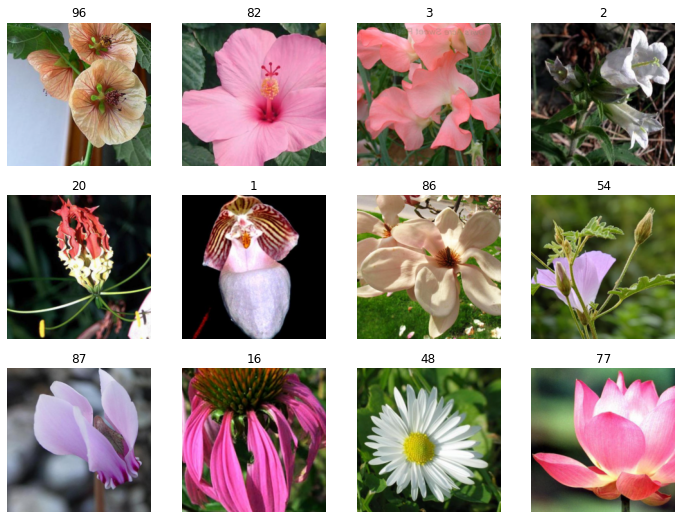

In [33]:
%%time

dls.show_batch(max_n = 12)

In [34]:
%%time
model = xresnet34()

learn = Learner(dls, model, loss_func = CrossEntropyLossFlat(), metrics = error_rate)

CPU times: user 457 ms, sys: 0 ns, total: 457 ms
Wall time: 452 ms


CPU times: user 39.5 s, sys: 19 s, total: 58.5 s
Wall time: 1min 52s


SuggestedLRs(valley=0.0030199517495930195)

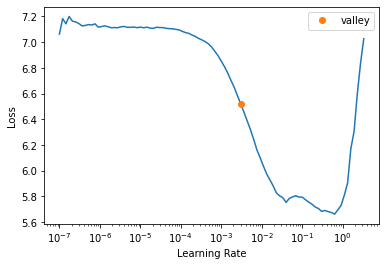

In [35]:
%%time
learn.lr_find()

In [36]:
%%time

learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,5.417981,5.602719,0.951961,00:30
1,4.560061,10.571857,0.968627,00:29
2,4.048362,4.184802,0.869608,00:29
3,3.594009,3.162652,0.746078,00:29
4,3.199291,2.991008,0.702941,00:29


CPU times: user 45.2 s, sys: 15.4 s, total: 1min
Wall time: 2min 27s


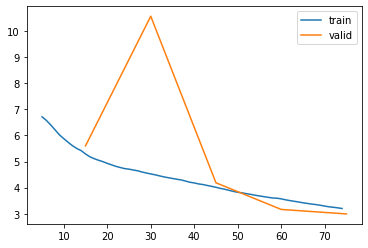

In [37]:
learn.recorder.plot_loss()

In [38]:
preds, targs = learn.get_preds()

In [39]:
%%time

accuracy(preds, targs)

CPU times: user 5.75 ms, sys: 0 ns, total: 5.75 ms
Wall time: 9.55 ms


TensorBase(0.2971)

In [40]:
## progressive resizing

In [41]:
%%time

def get_dls(size, bs):
  dblocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                      splitter = ColSplitter(),
                      get_x = ColReader(0),
                      get_y = ColReader(1),
                      item_tfms = Resize(460),
                      batch_tfms = [*aug_transforms(size = size, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
  
  return dblocks.dataloaders(df, bs = bs, device = "cuda")

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 13.4 µs


In [42]:
%%time
dls = get_dls(128, 128)

CPU times: user 267 ms, sys: 3.47 ms, total: 270 ms
Wall time: 272 ms


In [43]:
%%time
model = xresnet34()

learn = Learner(dls, model, loss_func = CrossEntropyLossFlat(), metrics = error_rate)

learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,6.029838,5.155550,0.973529,00:28
1,4.840552,9.334192,0.967647,00:26
2,4.250113,5.341747,0.902941,00:27
3,3.832331,4.135574,0.875490,00:26
4,3.490388,3.340845,0.791176,00:26


CPU times: user 26.7 s, sys: 7.28 s, total: 34 s
Wall time: 2min 16s


In [44]:
%%time
learn.dls = get_dls(224, 64)

learn.fine_tune(5, 3e-2)

epoch,train_loss,valid_loss,error_rate,time
0,3.765249,344.544647,0.990196,00:30


epoch,train_loss,valid_loss,error_rate,time
0,3.652014,4.244044,0.910784,00:30
1,3.405692,6.430016,0.924510,00:30
2,3.206435,3.987549,0.825490,00:29
3,2.953751,3.078043,0.720588,00:30
4,2.661577,2.876453,0.666667,00:30


CPU times: user 56.1 s, sys: 18.8 s, total: 1min 14s
Wall time: 3min


In [45]:
preds, targs = learn.get_preds()

In [46]:
accuracy(preds, targs)

TensorBase(0.3333)

In [47]:
## test time augmentation

In [48]:
%%time
preds, targs = learn.tta()

CPU times: user 20.4 s, sys: 1.39 s, total: 21.8 s
Wall time: 1min 10s


In [49]:
%%time

accuracy(preds, targs)

CPU times: user 5.65 ms, sys: 0 ns, total: 5.65 ms
Wall time: 4.52 ms


TensorBase(0.3490)